### Loading Libraries we will use in the project

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [ ]:
import sys
!pip install dvc

In [2]:
# import libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import scipy.stats as stat
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from IPython.display import Image  

from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')
import dvc.api

### Importing scripts & modules 

In [3]:
from decision import DecisionTreesModel
from logestic import LogesticRegressionModel

from helper import MyHelper
import utility
import plots
Helper = MyHelper()


### Loading the data

In [4]:
CSV_PATH = "../data/trainfinal.csv"
data_frame = Helper.read_csv(CSV_PATH)

>> file read as csv


In [ ]:
def get_data(tag='v10',
            path='data/trainfinal.csv', 
            repo ='C:/Users/ende/Desktop/test'
):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

### change categorical variables to numerical value


In [ ]:
data_frame.info()

### correcting the data types for each column

In [5]:
data_frame['Date']=pd.to_datetime(data_frame['Date'])
data_frame['date']=pd.to_datetime(data_frame['date'])
#data_frame['date']=data_frame['date'].values.astype('datetime64[D]')
#data_frame['Date']=data_frame['Date'].values.astype('datetime64[D]')
#data_frame['date']=data_frame['date'].dt.date
#data_frame['Date']=data_frame['Date'].dt.date


In [ ]:
data_frame.Store.unique()

In [ ]:
data_frame.info()

In [6]:
# change categorical variables to numerical value
lb = LabelEncoder()
data_frame['Assortment'] = lb.fit_transform(data_frame['Assortment'])
data_frame['StateHoliday'] = lb.fit_transform(data_frame['StateHoliday'])
data_frame['SchoolHoliday'] = lb.fit_transform(data_frame['SchoolHoliday'])
data_frame['StoreType'] = lb.fit_transform(data_frame['StoreType'])
data_frame['Promo2'] = lb.fit_transform(data_frame['Promo2'])
data_frame['Promo'] = lb.fit_transform(data_frame['Promo'])
data_frame['Open'] = lb.fit_transform(data_frame['Open'])
data_frame['date'] = lb.fit_transform(data_frame['date'])
data_frame['Date'] = lb.fit_transform(data_frame['Date'])




### Loading the different versions of data into separate dataframe

In [ ]:
train = get_data('v11')
#train dataframe is saved as version 10

In [7]:
train=data_frame

#### 1 Model training using Decision Tree


Train Test Split


In [8]:
#creating feature column
feature_cols = ['Store','DayOfWeek','Date','Customers','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','Promo','date']

X = train[feature_cols][0:10000]
y = train['Sales'][0:10000]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Model Training Using DecisionTreesModel

In [9]:
decisionTreesModel = DecisionTreesModel(X_train, X_test,  y_train, y_test)

clf, acc_arr, loss_arr = decisionTreesModel.train(2)

step 0: Validation Accuracy of DecisionTreesModel is: 0.163
step 0: Validation Loss of DecisionTreesModel is: 1880.287

step 1: Validation Accuracy of DecisionTreesModel is: 0.180
step 1: Validation Loss of DecisionTreesModel is: 2038.136



Evaluating our model

step 1: Test Accuracy of DecisionTreesModel is: 0.159
Test Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
        1570       0.00      0.00      0.00         0
        1828       0.00      0.00      0.00         0
        1974       0.00      0.00      0.00         0
        2014       0.00      0.00      0.00         0
        2026       0.00      0.00      0.00         0
        2138       0.00      0.00      0.00         0
        2151       0.00      0.00      0.00         0
        2260       0.00      0.00      0.00         0
        2274       0.00      0.00      0.00         0
        2284       0.00      0.00      0.00         0
        2321       0.00      0.00      0.00         0
        2335       0.00      0.00      0.00         0
        2362       0.00      0.00      0.00         0
        2424       0.00      0.00      0.00         0
        2451       0.00      0.00      0.00         0
        2497  

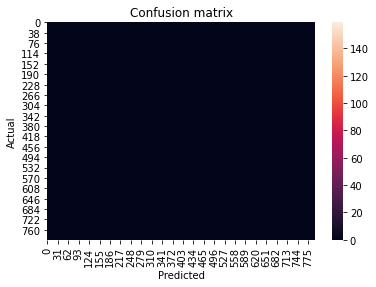

In [10]:
test_acc, loss, report, confusion_matrix = decisionTreesModel.test()
print(f"Loss on test data is: {loss:.3f}")
print()

Calculating feature importance

In [11]:
decisionTreesModel.get_feature_importance()

,feature,feature_importances
0,Store,0.0
1,DayOfWeek,0.0
2,Date,0.0
3,Customers,1.0
4,Open,0.0
5,Promo,0.0
6,StateHoliday,0.0
7,SchoolHoliday,0.0
8,StoreType,0.0
9,Assortment,0.0


In [13]:
!pip install graphviz

  Using cached graphviz-0.20-py3-none-any.whl (46 kB)


## Visualzing feature importance

In [14]:

dot_data = StringIO()

leaves_parallel=False
feature_cols = ['Store','DayOfWeek','Date','Customers','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','Promo','date']
out_put_file = "forcastDecisionTree.dot"

dot_data = export_graphviz(clf, out_file=out_put_file,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols)

graph = pydotplus.graphviz.graph_from_dot_file(out_put_file)
graph.write_png('forcastDecisionTree.png')

Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [15]:
dot_data = StringIO()

leaves_parallel=False
feature_cols = ['Store','DayOfWeek','Date','Customers','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','Promo','date']
out_put_file = "forcast.dot"

dot_data = export_graphviz(clf, out_file=out_put_file,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols)

graph = pydotplus.graphviz.graph_from_dot_file(out_put_file)
graph.write_png('forcast.png')

Image(graph.create_png())

InvocationException: GraphViz's executables not found

Model Building using Logestic Regression

2.1 Model training using Logestic Regression using browser dataframe

In [17]:
feature_cols = ['Store','DayOfWeek','Date','Customers','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','Promo','date']

X = train[feature_cols][0:10000]
y = train['Sales'][0:10000]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [18]:
logesticRegressionModel = LogesticRegressionModel(X_train, X_test,  y_train, y_test)

clf2, loss_arr_2, acc_arr_2 = logesticRegressionModel.train(5)

step 0: Validation Accuracy of LogesticRegression is: 0.168
step 0: Validation Loss of LogesticRegression is: 2384.926

step 1: Validation Accuracy of LogesticRegression is: 0.154
step 1: Validation Loss of LogesticRegression is: 2667.096

step 2: Validation Accuracy of LogesticRegression is: 0.172
step 2: Validation Loss of LogesticRegression is: 2610.811

step 3: Validation Accuracy of LogesticRegression is: 0.177
step 3: Validation Loss of LogesticRegression is: 2399.002

step 4: Validation Accuracy of LogesticRegression is: 0.183
step 4: Validation Loss of LogesticRegression is: 2558.968



step 1: Test Accuracy of LogesticRegression is: 0.159
Test Metrics
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       163
        1570       0.00      0.00      0.00         0
        1740       0.00      0.00      0.00         2
        1828       0.00      0.00      0.00         0
        1911       0.00      0.00      0.00         2
        1939       0.00      0.00      0.00         3
        1974       0.00      0.00      0.00         0
        2014       0.00      0.00      0.00         0
        2026       0.00      0.00      0.00         0
        2138       0.00      0.00      0.00         0
        2151       0.00      0.00      0.00         0
        2260       0.00      0.00      0.00         0
        2274       0.00      0.00      0.00         0
        2284       0.00      0.00      0.00         0
        2321       0.00      0.00      0.00         0
        2335       0.00      0.00      0.00         0
        2362  

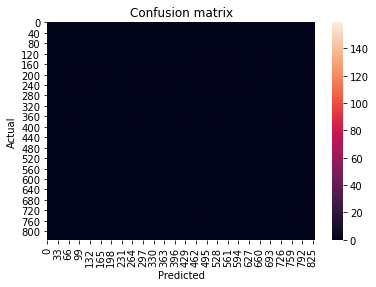

In [19]:
test_acc2, test_loss2, report2, matrix2  = logesticRegressionModel.test()
